# Importing Data

In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-anime-recommendations-dataset/rating.csv
/kaggle/input/new-anime-recommendations-dataset/anime.csv
/kaggle/input/anime-recommendations-database/rating.csv
/kaggle/input/anime-recommendations-database/anime.csv


In [36]:
animes = pd.read_csv("/kaggle/input/anime-recommendations-database/anime.csv")
ratings = pd.read_csv("/kaggle/input/anime-recommendations-database/rating.csv")

# Data Exploration and Data Cleaning

In [37]:
animes.shape

(12294, 7)

In [38]:
animes.head(5)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [39]:
# Members and episodes columns are unnecessary
animes = animes[["anime_id", "name", "genre", "type", "rating"]]

In [40]:
animes = animes.rename(columns = {"anime_id": "animeId", "name" : "title"})

In [41]:
animes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   animeId  12294 non-null  int64  
 1   title    12294 non-null  object 
 2   genre    12232 non-null  object 
 3   type     12269 non-null  object 
 4   rating   12064 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 480.4+ KB


In [42]:
animes.describe()

,animeId,rating
count,12294.000000,12064.000000
mean,14058.221653,6.473902
std,11455.294701,1.026746
min,1.000000,1.670000
25%,3484.250000,5.880000
50%,10260.500000,6.570000
75%,24794.500000,7.180000
max,34527.000000,10.000000


In [43]:
animes.isna().sum()

animeId      0
title        0
genre       62
type        25
rating     230
dtype: int64

In [44]:
animes = animes.dropna()

In [45]:
animes['genre'] = animes['genre'].apply(lambda x: x.split(", "))
animes.head()

,animeId,title,genre,type,rating
0,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",Movie,9.37
1,5114,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",TV,9.26
2,28977,Gintama°,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,9.25
3,9253,Steins;Gate,"[Sci-Fi, Thriller]",TV,9.17
4,9969,Gintama&#039;,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,9.16


In [46]:
animes["animeId"].nunique()

12017

In [47]:
animes.shape

(12017, 5)

In [48]:
ratings.shape

(7813737, 3)

In [49]:
ratings.head(5)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [50]:
ratings = ratings.rename(columns = {"user_id": "userId","anime_id": "animeId"})

In [51]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   animeId  int64
 2   rating   int64
dtypes: int64(3)
memory usage: 178.8 MB


In [52]:
ratings.describe()

,userId,animeId,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


In [53]:
ratings.isna().sum()

userId     0
animeId    0
rating     0
dtype: int64

In [54]:
ratings["userId"].nunique()

73515

In [55]:
ratings["animeId"].nunique()

11200

In [56]:
ratings.shape

(7813737, 3)

## What is the distribution of Anime Ratings

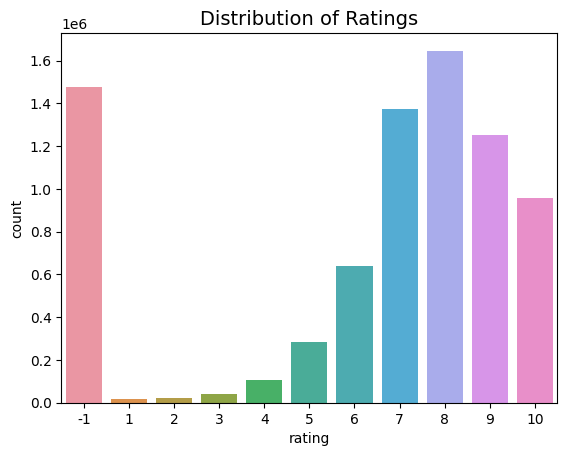

In [57]:
sns.countplot(x = 'rating', data = ratings)
plt.title("Distribution of Ratings", fontsize = 14)
plt.show()

#### For some reason a significant portion of our ratings is below 0 which may be an error on the data collection process used for this dataset as we expected a rating on a scale from 1 - 10. In this case I will remove every row with a value less than 0 as this incorrect observation / outlier in our data may make things more difficult for use to handle / interpret in the future.

In [58]:
ratings = ratings.query('rating >= 0')

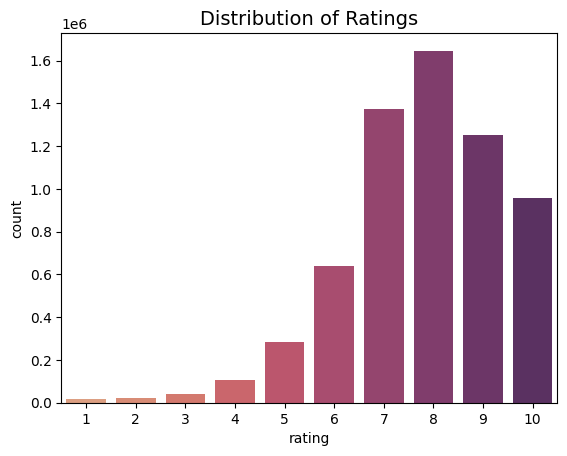

In [59]:
sns.countplot(x = 'rating', data = ratings, palette = "flare")
plt.title("Distribution of Ratings", fontsize = 14)
plt.show()

#### From the graph above we can see that the ratings are relatively positive with the most frequent being a rating of 8 and the least frequent being a rating of 1.

## Note that there are more unique animes in the **anime** dataset than in the **ratings** dataset. This means that some of the rows in our anime dataset will not be used. The best way to deal with this is to remove all rows in our **anime** dataset that **ids**' don't exist in the **ratings** dataset. We will also do this for both datasets ensuring each dataset has an "animeId" that exists in both datasets.

In [60]:
print(f"The amount of unique anime Id's in the 'anime' dataset is {animes['animeId'].nunique()}")
print(f"The amount of unique anime Id's in the 'ratings' dataset is {ratings['animeId'].nunique()}")

The amount of unique anime Id's in the 'anime' dataset is 12017
The amount of unique anime Id's in the 'ratings' dataset is 9927


In [61]:
animes = animes[animes['animeId'].isin(ratings['animeId'])]
ratings = ratings[ratings['animeId'].isin(animes['animeId'])]

In [62]:
print(f"The amount of unique anime Id's in the 'anime' dataset is {animes['animeId'].nunique()}")
print(f"The amount of unique anime Id's in the 'ratings' dataset is {ratings['animeId'].nunique()}")

The amount of unique anime Id's in the 'anime' dataset is 9892
The amount of unique anime Id's in the 'ratings' dataset is 9892


## Which Animes are most frequently rated

In [63]:
anime_ratings = ratings.merge(animes, on = "animeId")
anime_ratings['title'].value_counts()[0:10]

title
Death Note                            34226
Sword Art Online                      26310
Shingeki no Kyojin                    25290
Code Geass: Hangyaku no Lelouch       24126
Angel Beats!                          23565
Elfen Lied                            23528
Naruto                                22071
Fullmetal Alchemist: Brotherhood      21494
Fullmetal Alchemist                   21332
Code Geass: Hangyaku no Lelouch R2    21124
Name: count, dtype: int64

#### Death Note is the anime with the most ratings at a count of 34,226 ratings.

## What are the lowest and highest rated animes

In [64]:
average_ratings = ratings.groupby('animeId')['rating'].mean().reset_index()

In [65]:
lowest = average_ratings.loc[average_ratings['rating'].idxmin()]
animes[animes["animeId"] == lowest['animeId']]

,animeId,title,genre,type,rating
8899,5207,Hokuro Kyoudai Full Throttle!!!!,[Comedy],ONA,3.97


In [66]:
highest = average_ratings.loc[average_ratings['rating'].idxmax()]
animes[animes["animeId"] == highest['animeId']]

,animeId,title,genre,type,rating
9992,3769,Play Ball 2nd,"[Action, Shounen, Sports]",TV,6.56


#### But based on our rating distributions from before, these values don't seem to match up. Lets see the lowest and highest rated animes based on the anime dataframe itself

In [67]:
tempLowest = animes.sort_values(by = 'rating', ascending = True)
tempLowest.head()

,animeId,title,genre,type,rating
8058,3287,Tenkuu Danzai Skelter+Heaven,"[Mecha, Sci-Fi]",OVA,2.00
8057,13405,Utsu Musume Sayuri,"[Comedy, Dementia]",OVA,2.14
8056,413,Hametsu no Mars,"[Horror, Sci-Fi]",OVA,2.37
10087,14781,Roboteuwang Sseonsyakeu,"[Action, Mecha, Sci-Fi]",Movie,2.49
9516,24259,Mechano: Scientific Attack Force,"[Comedy, Dementia, Fantasy, Horror, Music, Par...",OVA,2.55


In [68]:
tempHighest = animes.sort_values(by = 'rating', ascending = False)
tempHighest.head()

,animeId,title,genre,type,rating
0,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",Movie,9.37
1,5114,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",TV,9.26
2,28977,Gintama°,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,9.25
3,9253,Steins;Gate,"[Sci-Fi, Thriller]",TV,9.17
4,9969,Gintama&#039;,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,9.16


#### As we can see that the highest rated Anime is Kimi no Na wa. with a rating of 9.37

In [69]:
value_counts = ratings['animeId'].value_counts()
print("\nOccurrences of animeId 32281:", value_counts.get(32281, 0))
print("\nOccurrences of animeId 413:", value_counts.get(413, 0))
print("\nOccurrences of animeId 14781:", value_counts.get(14781, 0))


Occurrences of animeId 32281: 1961

Occurrences of animeId 413: 1024

Occurrences of animeId 14781: 1


#### From above we can see that the anime with Id 14781 only has 1 rating, so even though it is 1 or 5 or any rating not many people have even watched this anime meaning that it's rating is most likely a matter of bias from the user rather than the quality of the anime

#### Since the amount of ratings per anime is not equal as seen above this means that we need another metric other than the average rating in order to get a better idea of how popular these anime are

## Byesian Average

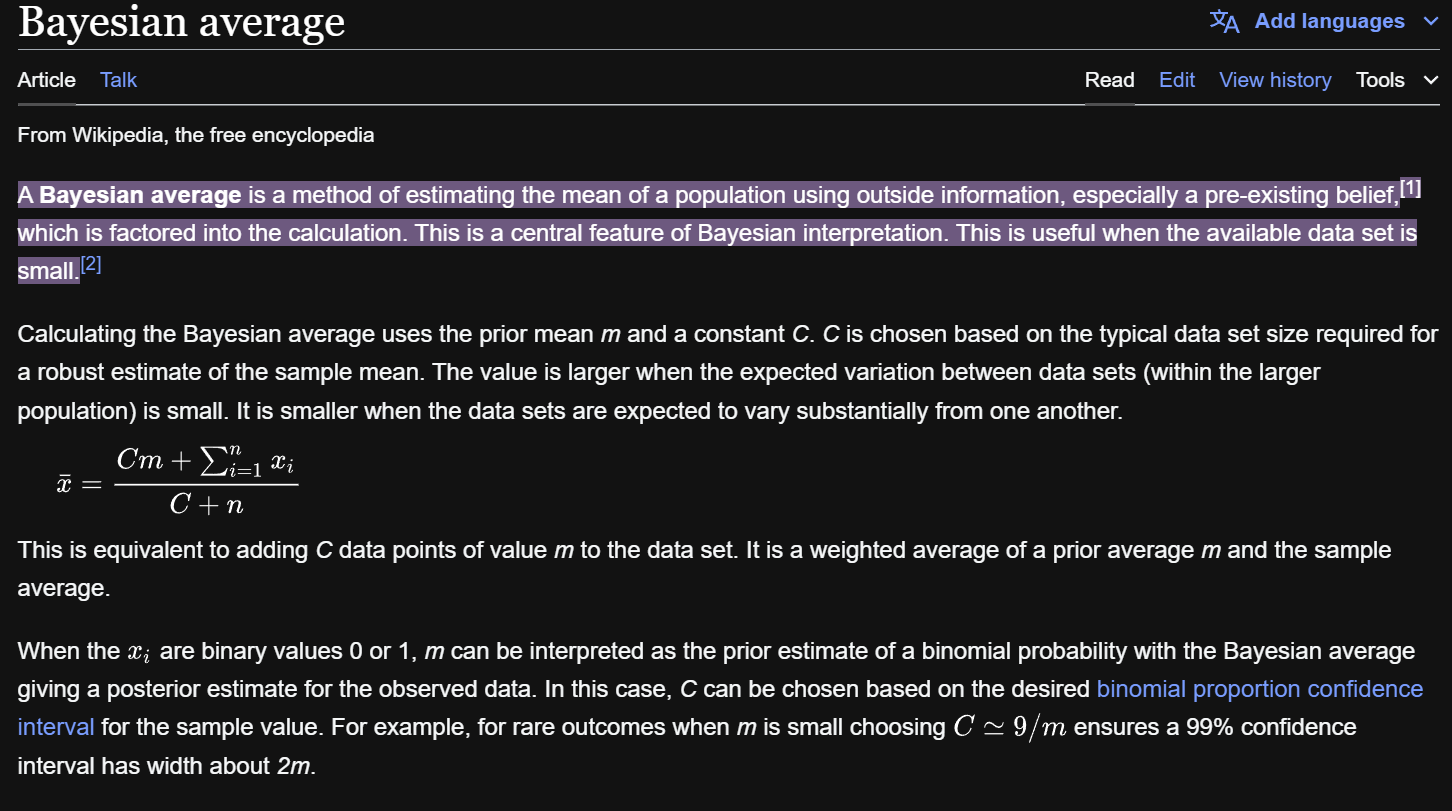

#### For this project lets have our m be the average rating for all ratings and our C be the average amount of all anime

In [70]:
# Displays the amount of times a movie was reviwed paired with it's average rating
anime_stats = ratings.groupby("animeId")["rating"].agg(["count", "mean"])
anime_stats.head(5)

,count,mean
animeId,,
1,13449,8.869433
5,5790,8.439724
6,9385,8.419393
7,2169,7.533426
8,308,7.198052


In [71]:
C = anime_stats["count"].mean()
m = anime_stats["mean"].mean()
print(f"Average amount of ratings for a given anime: {C:.2f}")
print(f"Average rating for a given anime: {m:.2f}")

Average amount of ratings for a given anime: 640.63
Average rating for a given anime: 6.65


In [72]:
def bayesian_avg(ratings):
    bayesian_avg = (C * m + ratings.sum() )/( C + ratings.count() )
    return round(bayesian_avg, 3)

In [73]:
bayesian_avg_ratings = ratings.groupby('animeId')['rating'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['animeId', 'bayesian_avg']
anime_stats = anime_stats.merge(bayesian_avg_ratings, on='animeId')

In [74]:
bayesian_avg_ratings

,animeId,bayesian_avg
0,1,8.768
1,5,8.261
2,6,8.306
3,7,7.331
4,8,6.825
...,...,...
9887,34324,6.633
9888,34325,6.661
9889,34349,6.647
9890,34367,6.637


In [75]:
anime_stats = anime_stats.merge(animes[['animeId', 'title']])
anime_stats.sort_values('bayesian_avg', ascending=False).head()

,animeId,count,mean,bayesian_avg,title
3936,5114,21494,9.322741,9.245,Fullmetal Alchemist: Brotherhood
5517,9253,17151,9.261326,9.167,Steins;Gate
3508,4181,15518,9.165292,9.065,Clannad: After Story
6201,11061,7477,9.234586,9.030,Hunter x Hunter (2011)
2642,2904,21124,9.059837,8.989,Code Geass: Hangyaku no Lelouch R2


#### So from the above dataframe our new Highest Rated Anime is Fullmetal Alchemist: Brotherhood with 21,494 ratings and a byesian average score of 9.245

In [76]:
anime_stats.sort_values('bayesian_avg', ascending=True).head()

,animeId,count,mean,bayesian_avg,title
385,413,1024,2.470703,4.077,Hametsu no Mars
7484,19315,2135,4.217799,4.778,Pupa
2918,3287,210,2.076190,5.517,Tenkuu Danzai Skelter+Heaven
1485,1639,1783,5.351655,5.694,Boku no Pico
714,788,753,5.073041,5.796,Eiken: Eikenbu yori Ai wo Komete


#### So from the above dataframe our new Lowest Rated Anime is Hametsu no Mars with 1,024 ratings and a byesian average score of 4.077

## Top 10 Genres By Highest Average Rating

In [77]:
animes_renamed = animes.rename(columns={'rating': 'anime_rating'})
# Explode genres into separate rows -> this helps us calculate our average score easier
animes_exploded = animes_renamed.explode('genre')

genre_ratings = pd.merge(ratings, animes_exploded, on='animeId')
genre_ratings

genre_average_ratings = genre_ratings.groupby('genre')['rating'].mean().reset_index()

# Sort genres by average rating
top_genres = genre_average_ratings.sort_values(by='rating', ascending=False)

print("\nTop 10 Genres By Highest Average Ratings:")
top_genres.head(10)


Top 10 Genres By Highest Average Ratings:


,genre,rating
39,Thriller,8.380743
23,Police,8.172308
14,Josei,8.127601
24,Psychological,8.111610
26,Samurai,8.094889
19,Military,8.094556
12,Historical,8.066156
21,Mystery,8.050109
6,Drama,8.001099
36,Sports,8.000256


## What is the average rating for each anime type (TV, Movie, OVA, etc)

In [78]:
type_average_ratings = genre_ratings.groupby('type')['rating'].mean().sort_values(ascending = False).reset_index()

In [79]:
print("Anime Types Ranked By Average Rating:")
type_average_ratings

Anime Types Ranked By Average Rating:


,type,rating
0,TV,7.913115
1,Movie,7.900056
2,Special,7.521847
3,OVA,7.439811
4,Music,7.329652
5,ONA,7.250831


## Compare the rating distribution between Movies and TV anime types

In [80]:
movie_ratings = genre_ratings[genre_ratings['type'] == 'Movie']
tv_ratings = genre_ratings[genre_ratings['type'] == 'TV']

movie_rating_distribution = movie_ratings['rating'].value_counts().sort_index()
tv_rating_distribution = tv_ratings['rating'].value_counts().sort_index()

distribution_df = pd.DataFrame({
    'Movie': movie_rating_distribution,
    'TV Show': tv_rating_distribution
}).fillna(0)  # Fill NaN values with 0

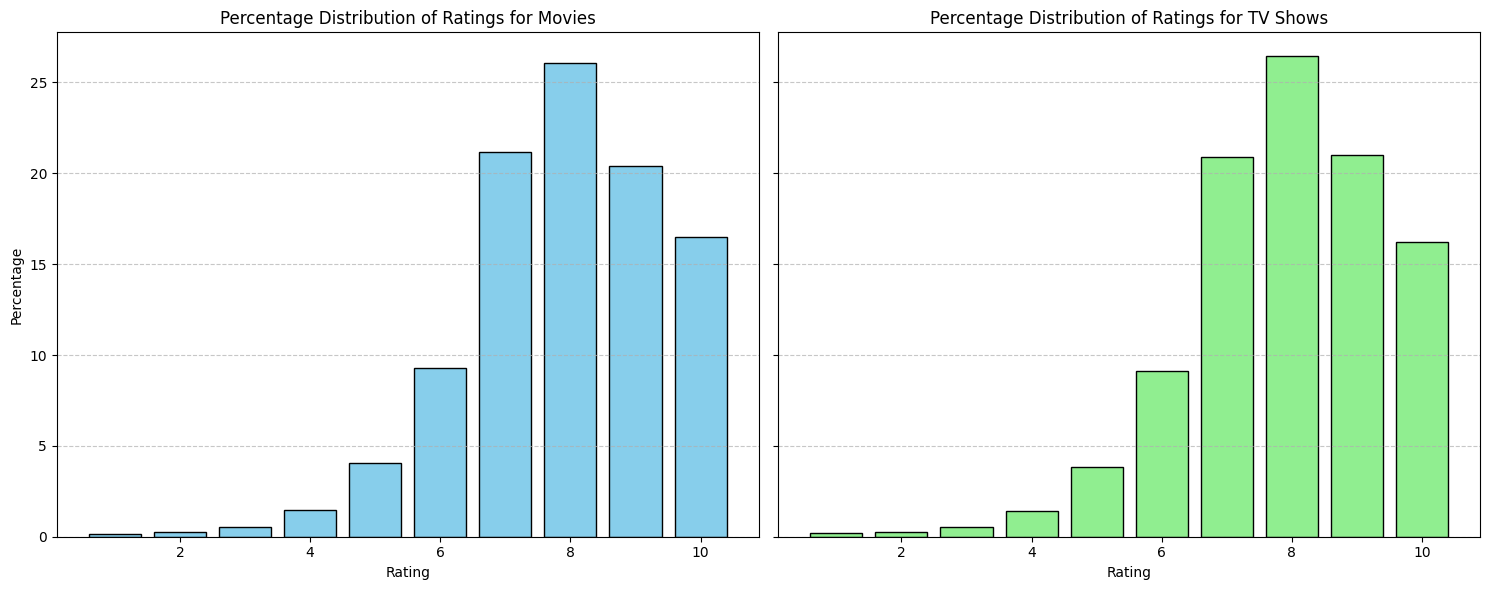

In [81]:
movie_distribution = movie_ratings['rating'].value_counts(normalize=True).sort_index() * 100
tv_distribution = tv_ratings['rating'].value_counts(normalize=True).sort_index() * 100

fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

axes[0].bar(movie_distribution.index, movie_distribution.values, color='skyblue', edgecolor='black')
axes[0].set_title('Percentage Distribution of Ratings for Movies')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Percentage')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

axes[1].bar(tv_distribution.index, tv_distribution.values, color='lightgreen', edgecolor='black')
axes[1].set_title('Percentage Distribution of Ratings for TV Shows')
axes[1].set_xlabel('Rating')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### From the graphs above, we can see that movies tend to have a more concentrated rating distribution with a peak at 8. TV shows also share a similar distribution with a peak at 8. This suggests that both movies and TV shows are generally well-received by audiences, with a significant portion of viewers rating them highly. However, it is important to note that there are significantly more data for TV shows than movies, indicating a broader range of audience opinions and possibly a larger viewer base for TV shows

# Data Preprocessing

## Removing Duplicate userId and animeId pairs
#### We're going to remove all duplicate userId and animeId pairs and keep the pair with the highest rating value. If we had a timestamp value then we would keep the pair with the most recent timestamp value

In [82]:
highest_idx = ratings.groupby(['userId', 'animeId'])['rating'].idxmax()
ratings = ratings.loc[highest_idx]
print("DataFrame with highest rating for each userId and animeId pair:")
ratings

DataFrame with highest rating for each userId and animeId pair:


,userId,animeId,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


## Removing Inactive Users and Unpopular Anime

#### Given the large size of our dataset and our limited computational resources we are going to cull the least popular and most inactive users to make our later analysis easier to compute

In [83]:
#This has the amount of times each anime was rated
anime_vote_counts = ratings.groupby("animeId")['rating'].agg('count')
#This has the users and how many times they've rated an anime
user_vote_counts = ratings.groupby("userId")['rating'].agg('count')

In [84]:
user_vote_counts

userId
1          4
2          1
3         92
5        459
7        343
        ... 
73512     12
73513     33
73514      1
73515    179
73516      2
Name: rating, Length: 69600, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


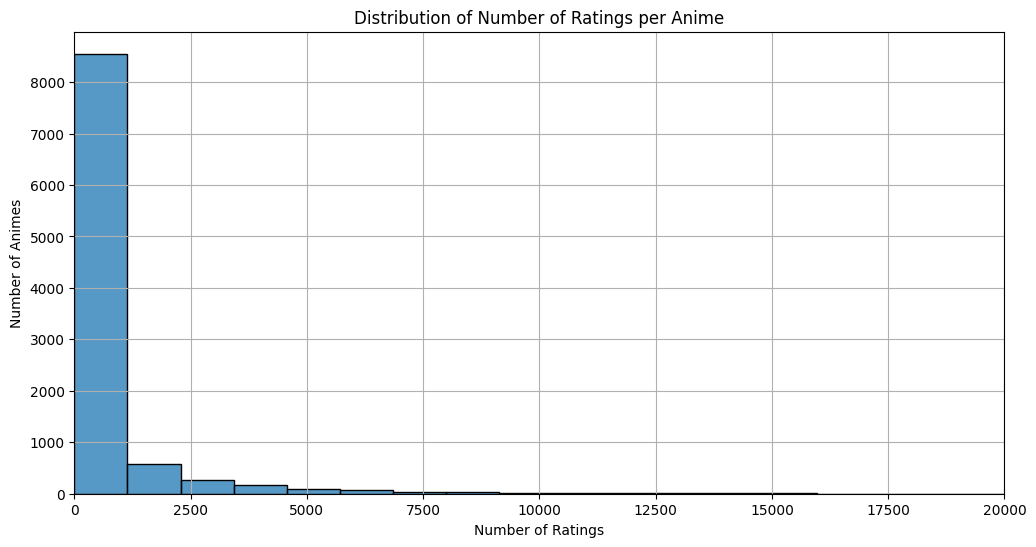

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot anime vote counts
plt.figure(figsize=(12, 6))
sns.histplot(anime_vote_counts, bins=30, kde=False)
plt.title('Distribution of Number of Ratings per Anime')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Animes')
plt.grid(True)
plt.xlim(0, 20000)
plt.show()


#### The above graph indicates that the majority of animes within our dataset have between 0-5,000 ratings, while significantly fewer have between 5,000-10,000 ratings. 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


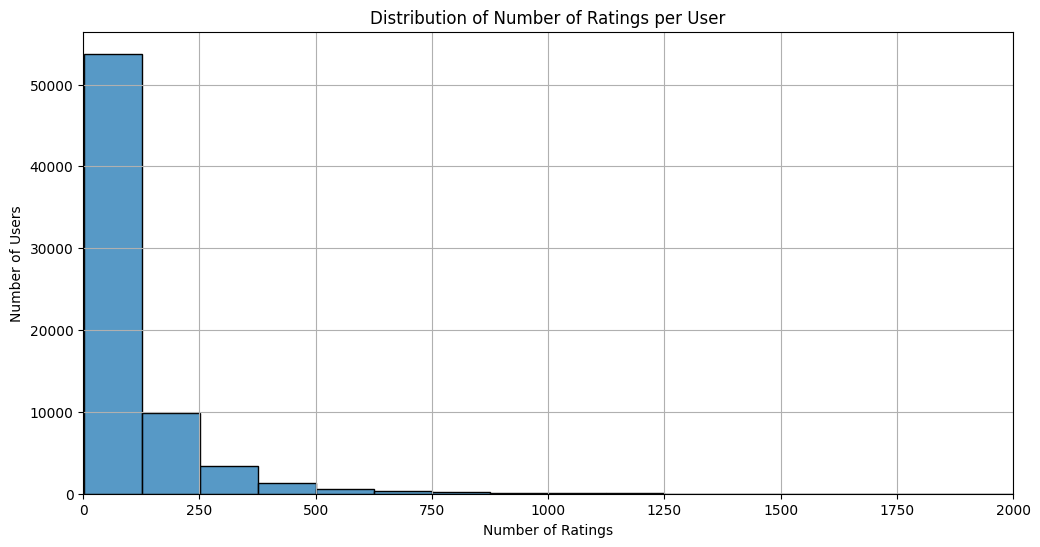

In [86]:
# Plot user vote counts
plt.figure(figsize=(12, 6))
sns.histplot(user_vote_counts, bins=30, kde=False)
plt.title('Distribution of Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.grid(True)

# Set x-axis limit
plt.xlim(0, 2000)

plt.show()

#### The majority of users (50,000+) have rated fewer than 125 anime.

#### Let's try cleaning our ratings data so that we only keep the users that have rated more than 100 times and the animes that have over 1000 ratings

## Filtering Our Ratings Dataframe

In [87]:
anime_vote_counts = ratings.groupby("animeId")['rating'].agg('count')

amount = 1000

animes_with_min_ratings = anime_vote_counts[anime_vote_counts >= amount]

filtered_ratings = ratings[ratings['animeId'].isin(animes_with_min_ratings.index)]

num_animes_filtered = animes_with_min_ratings.count()

print(f"Number of animes that have been rated {amount} or more times: {num_animes_filtered}")

Number of animes that have been rated 1000 or more times: 1462


In [88]:
user_vote_counts = filtered_ratings.groupby("userId")['rating'].agg('count')

amount = 150

users_with_min_ratings = user_vote_counts[user_vote_counts >= amount]

filtered_ratings = filtered_ratings[filtered_ratings['userId'].isin(users_with_min_ratings.index)]

num_users_filtered = users_with_min_ratings.count()

print(f"Number of users who have rated {amount} or more animes: {num_users_filtered}")

Number of users who have rated 150 or more animes: 10423


In [89]:
filtered_ratings["animeId"].nunique()

1462

## Filtering Our Animes Dataframe

In [90]:
def create_filtered_animes(filtered_ratings, animes):
    unique_anime_ids = filtered_ratings['animeId'].unique()

    filtered_animes = animes[animes['animeId'].isin(unique_anime_ids)]
    
    return filtered_animes

filtered_animes = create_filtered_animes(filtered_ratings, animes)

### Let's apply our Bayesian Average Formula to this filtered animes dataframe.

In [91]:
def bayesian_avg(anime_ratings, global_stats):

    C, m = global_stats
    C_anime = len(anime_ratings)
    mean_anime = anime_ratings.mean()
    return (C * m + C_anime * mean_anime) / (C + C_anime)

# Compute global statistics
filtered_anime_stats = filtered_ratings.groupby('animeId')['rating'].agg(['count', 'mean'])
C = filtered_anime_stats['count'].mean()
m = filtered_anime_stats['mean'].mean()

# Apply Bayesian average
global_stats = (C, m)
bayesian_avg_ratings = filtered_ratings.groupby('animeId')['rating'].apply(lambda x: bayesian_avg(x, global_stats)).reset_index()
bayesian_avg_ratings.columns = ['animeId', 'bayesian_avg']

# Merge with animes DataFrame
filtered_animes = animes.rename(columns={'anime_id': 'animeId'})
filtered_animes = filtered_animes.merge(bayesian_avg_ratings, on='animeId')


In [92]:
filtered_animes

,animeId,title,genre,type,rating,bayesian_avg
0,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",Movie,9.37,8.233606
1,5114,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",TV,9.26,8.914057
2,28977,Gintama°,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,9.25,8.177884
3,9253,Steins;Gate,"[Sci-Fi, Thriller]",TV,9.17,8.877833
4,9969,Gintama&#039;,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,9.16,8.411344
...,...,...,...,...,...,...
1457,746,Papa to Kiss in the Dark,"[Comedy, Drama, Romance, Yaoi]",OVA,6.47,7.355022
1458,8577,Aki-Sora: Yume no Naka,"[Ecchi, Romance, Seinen, Yuri]",OVA,6.41,7.273082
1459,651,Green Green Thirteen: Erolutions,"[Comedy, Hentai, Romance]",OVA,6.26,7.281290
1460,5391,Pico to Chico,"[Hentai, Yaoi]",OVA,5.19,7.188167


In [93]:
filtered_animes["animeId"].nunique()

1462

# Collaborative Based Filtering 

# Item Based Recommendation  with k-Nearest Neighbors Algorithm

## Creating CSR Matrix

In [94]:
from scipy.sparse import csr_matrix

def createCSRMatrix(df):
    unique_users = df['userId'].unique()
    unique_animes = df['animeId'].unique()
    
    user_mapper = {user: idx for idx, user in enumerate(unique_users)}
    anime_mapper = {anime: idx for idx, anime in enumerate(unique_animes)}
    
    user_inv_mapper = {idx: user for user, idx in user_mapper.items()}
    anime_inv_mapper = {idx: anime for anime, idx in anime_mapper.items()}
    
    user_indices = df['userId'].map(user_mapper)
    anime_indices = df['animeId'].map(anime_mapper)
    
    X = csr_matrix((df['rating'], (user_indices, anime_indices)),
                   shape=(len(unique_users), len(unique_animes)))
    
    return X, user_mapper, anime_mapper, user_inv_mapper, anime_inv_mapper

X, user_mapper, anime_mapper, user_inv_mapper, anime_inv_mapper = createCSRMatrix(filtered_ratings)

## Getting Our Item Based Recommendations

In [95]:
from sklearn.neighbors import NearestNeighbors
def get_item_based_recommendations(anime_id, X, anime_mapper, anime_inv_mapper, metric='cosine'):
    X = X.T
    neighbour_ids = []
    scores = []
    
    # Access the index for the given anime_id
    anime_ind = anime_mapper[anime_id]
    anime_vec = X[anime_ind]
    if isinstance(anime_vec, (np.ndarray)):
        anime_vec = anime_vec.reshape(1, -1)
    
    # Use NearestNeighbors to find all distances
    kNN = NearestNeighbors(n_neighbors=X.shape[0], algorithm="brute", metric=metric)
    kNN.fit(X)
    
    # Find the nearest neighbors
    neighbour = kNN.kneighbors(anime_vec, return_distance=True)
    for i in range(1, X.shape[0]):  # We start from 1 to skip the given anime itself
        n = neighbour[1].item(i)
        neighbour_ids.append(anime_inv_mapper[n])
        # Convert cosine similarity to distance
        score = 1 - neighbour[0].item(i)
        scores.append(score)
    
    # Convert neighbour_ids to a DataFrame for easy merging
    similar_animes_df = pd.DataFrame({
        'animeId': neighbour_ids,
        'score': scores
    })
    
    similar_animes_df = similar_animes_df.merge(filtered_animes[['animeId', 'title']], on='animeId', how='left')
    
    return similar_animes_df

# Example usage
similar_animes_df = get_item_based_recommendations(1, X, anime_mapper, anime_inv_mapper, metric='cosine')
similar_animes_df

,animeId,score,title
0,5,0.692474,Cowboy Bebop: Tengoku no Tobira
1,205,0.670455,Samurai Champloo
2,6,0.660930,Trigun
3,30,0.647797,Neon Genesis Evangelion
4,227,0.632748,FLCL
...,...,...,...
1456,8063,0.096291,Sekaiichi Hatsukoi OVA
1457,12711,0.095971,Uta no☆Prince-sama♪ Maji Love 2000%
1458,21563,0.095549,Kamigami no Asobi
1459,8634,0.094737,Koisuru Boukun


In [96]:
print(f"Because You Liked {animes[animes['animeId'] == 20]['title'].values[0]}:")
similar_anime = get_item_based_recommendations(20, X, anime_mapper, anime_inv_mapper)
similar_anime.head(5)

Because You Liked Naruto:


,animeId,score,title
0,1535,0.709304,Death Note
1,11757,0.676952,Sword Art Online
2,1575,0.668646,Code Geass: Hangyaku no Lelouch
3,5114,0.661018,Fullmetal Alchemist: Brotherhood
4,16498,0.659734,Shingeki no Kyojin


In [97]:
import random
anime_ids = filtered_animes['animeId'].tolist()
random_anime_id = random.choice(anime_ids)
print(f"Because You Liked {animes[animes['animeId'] == random_anime_id]['title'].values[0]}:")
similar_anime = get_item_based_recommendations(random_anime_id, X, anime_mapper, anime_inv_mapper, metric='cosine')
similar_anime.head(20)

Because You Liked Gakusen Toshi Asterisk 2nd Season:


,animeId,score,title
0,30544,0.768792,Gakusen Toshi Asterisk
1,31338,0.633073,Hundred
2,30296,0.619295,Rakudai Kishi no Cavalry
3,30749,0.611715,Saijaku Muhai no Bahamut
4,24133,0.596341,Taimadou Gakuen 35 Shiken Shoutai
5,30363,0.573153,Shinmai Maou no Testament Burst
6,31404,0.549074,Netoge no Yome wa Onnanoko ja Nai to Omotta?
7,23233,0.539553,Shinmai Maou no Testament
8,25283,0.538319,Kuusen Madoushi Kouhosei no Kyoukan
9,31637,0.532475,"Gate: Jieitai Kanochi nite, Kaku Tatakaeri 2nd..."


# User Based Recommendation

## Creating User - Item Matrix

In [98]:
user_item_matrix = filtered_ratings.pivot(index='userId', columns='animeId', values='rating')

In [99]:
user_item_matrix

animeId,1,5,6,7,15,16,18,19,20,22,...,32281,32282,32379,32438,32542,32729,32828,32935,32998,34240
userId,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,8.0,NaN,6.0,NaN,6.0,NaN,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,7.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,...,NaN,8.0,NaN,3.0,7.0,5.0,7.0,9.0,8.0,8.0
21,9.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,10.0,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73502,NaN,NaN,NaN,9.0,NaN,10.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73503,9.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.0,6.0,NaN,NaN,NaN,NaN,9.0,NaN


## Normalize Our User Item Matrix

### We normalize our ratings since some people tend to rate higher than others, we normalize the rating by extracting the average rating of each user. After nomalization, the movies with a rating less than the users average will be negative value and the users with rating higher than the users average will get a positive value.

In [100]:
# Normalize user-item matrix
matrix_norm = user_item_matrix.subtract(user_item_matrix.mean(axis=1), axis = 'rows')
matrix_norm.head()

animeId,1,5,6,7,15,16,18,19,20,22,...,32281,32282,32379,32438,32542,32729,32828,32935,32998,34240
userId,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,3.705405,NaN,1.705405,NaN,1.705405,NaN,1.705405,0.705405,...,NaN,NaN,NaN,NaN,NaN,NaN,2.705405,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.486166,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,-0.139818,NaN,NaN,NaN,NaN,2.860182,NaN,NaN,...,NaN,0.860182,NaN,-4.139818,-0.139818,-2.139818,-0.139818,1.860182,0.860182,0.860182
21,1.287582,1.287582,NaN,NaN,NaN,NaN,NaN,NaN,0.287582,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.714286,NaN,...,NaN,NaN,-2.714286,NaN,NaN,NaN,NaN,3.285714,1.285714,NaN


## Obtain User Similarity Matrix

In [101]:
# User similarity matrix using Pearson correlation
user_similarity = matrix_norm.T.corr()
user_similarity

userId,5,7,17,21,38,43,46,73,77,123,...,73457,73460,73462,73476,73499,73500,73502,73503,73507,73515
userId,,,,,,,,,,,,,,,,,,,,,
5,1.000000,0.251140,0.412720,0.156502,0.584326,0.308032,0.313575,0.159669,0.444778,0.320812,...,0.312238,0.197595,0.473270,0.605315,0.311172,0.108194,0.023959,0.423221,0.325957,0.469986
7,0.251140,1.000000,0.493770,0.521749,0.488378,-0.006173,0.195257,0.191274,0.345786,0.287004,...,0.196064,0.361743,0.071793,0.367370,0.338458,0.430124,0.356739,0.479942,-0.087418,0.506028
17,0.412720,0.493770,1.000000,0.666721,0.382651,-0.044563,0.220189,0.327842,0.355124,0.385591,...,0.403121,0.279498,0.047395,0.609718,0.550428,0.495383,0.441431,0.304918,0.050519,0.345249
21,0.156502,0.521749,0.666721,1.000000,0.382196,-0.021243,0.328196,0.387192,0.268393,0.357588,...,0.317999,-0.009800,0.235705,0.578671,0.503398,0.469670,0.647423,0.524632,0.168938,0.389327
38,0.584326,0.488378,0.382651,0.382196,1.000000,0.071565,0.490771,0.270529,0.443744,0.315937,...,0.262240,0.075239,0.395871,0.441058,0.328224,0.359448,0.280488,0.152004,0.373529,0.342316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73500,0.108194,0.430124,0.495383,0.469670,0.359448,0.035669,0.510789,-0.124393,0.288014,0.216440,...,0.419025,0.262087,0.131554,0.158710,0.217067,1.000000,0.133166,0.195607,0.319190,0.382412
73502,0.023959,0.356739,0.441431,0.647423,0.280488,0.058994,0.143504,0.467742,-0.254674,0.077242,...,0.236670,0.333461,0.045423,0.163109,0.408283,0.133166,1.000000,0.174942,0.082515,0.410609
73503,0.423221,0.479942,0.304918,0.524632,0.152004,-0.074398,0.368820,0.253021,0.136353,0.272480,...,0.455739,0.097910,0.317822,0.472130,0.275832,0.195607,0.174942,1.000000,0.399928,0.488108


In [102]:
# Alternatively we can create our similarity matrix using cosine similarity which is significantly faster and less computationally intensive than the pearson correlation method
# User similarity matrix using cosine similarity
# For this demonstration we'll use Pearson Correlation but for the function we'll create we'll use Cosine Similarity as it is much faster to test

user_similarity_cosine = cosine_similarity(matrix_norm.fillna(0))
user_similarity_cosine

array([[ 1.00000000e+00,  9.09046478e-02,  1.26276584e-01, ...,
         9.49971572e-02,  6.94485642e-02,  5.22345218e-02],
       [ 9.09046478e-02,  1.00000000e+00,  1.60979594e-01, ...,
         2.59239422e-02, -9.15656827e-04,  5.33175819e-02],
       [ 1.26276584e-01,  1.60979594e-01,  1.00000000e+00, ...,
         1.04584350e-01,  4.84436239e-02,  8.60656944e-02],
       ...,
       [ 9.49971572e-02,  2.59239422e-02,  1.04584350e-01, ...,
         1.00000000e+00,  1.27000995e-01,  1.51758951e-01],
       [ 6.94485642e-02, -9.15656827e-04,  4.84436239e-02, ...,
         1.27000995e-01,  1.00000000e+00,  1.02921982e-01],
       [ 5.22345218e-02,  5.33175819e-02,  8.60656944e-02, ...,
         1.51758951e-01,  1.02921982e-01,  1.00000000e+00]])

## Obtaining Similar Users

In [103]:
ratings_per_user = filtered_ratings.groupby('userId').size()

picked_userid = ratings_per_user.sample(1, random_state=None).index[0]

user_similarity_exclude = user_similarity.drop(index=picked_userid)

user_similarity_exclude.head()

userId,5,7,17,21,38,43,46,73,77,123,...,73457,73460,73462,73476,73499,73500,73502,73503,73507,73515
userId,,,,,,,,,,,,,,,,,,,,,
5,1.000000,0.251140,0.412720,0.156502,0.584326,0.308032,0.313575,0.159669,0.444778,0.320812,...,0.312238,0.197595,0.473270,0.605315,0.311172,0.108194,0.023959,0.423221,0.325957,0.469986
7,0.251140,1.000000,0.493770,0.521749,0.488378,-0.006173,0.195257,0.191274,0.345786,0.287004,...,0.196064,0.361743,0.071793,0.367370,0.338458,0.430124,0.356739,0.479942,-0.087418,0.506028
17,0.412720,0.493770,1.000000,0.666721,0.382651,-0.044563,0.220189,0.327842,0.355124,0.385591,...,0.403121,0.279498,0.047395,0.609718,0.550428,0.495383,0.441431,0.304918,0.050519,0.345249
21,0.156502,0.521749,0.666721,1.000000,0.382196,-0.021243,0.328196,0.387192,0.268393,0.357588,...,0.317999,-0.009800,0.235705,0.578671,0.503398,0.469670,0.647423,0.524632,0.168938,0.389327
38,0.584326,0.488378,0.382651,0.382196,1.000000,0.071565,0.490771,0.270529,0.443744,0.315937,...,0.262240,0.075239,0.395871,0.441058,0.328224,0.359448,0.280488,0.152004,0.373529,0.342316


In [104]:
n = 10

# User similarity threshold
# This means that a user must have a Pearson correlation coefficient of at least 0.3 to be considered as a similar user.
user_similarity_threshold = 0.3

similar_users = user_similarity[user_similarity[picked_userid]>user_similarity_threshold][picked_userid].sort_values(ascending=False)[:n]

top_similar_users = similar_users.head(n)

top_similar_users = top_similar_users.reset_index()
top_similar_users.columns = ['userId', 'similarityScore']

print(f'The top {n} similar users for user {picked_userid} are\n')
top_similar_users

The top 10 similar users for user 32167 are



,userId,similarityScore
0,32167,1.000000
1,65922,0.815302
2,51178,0.783927
3,16109,0.754727
4,11167,0.742476
5,10894,0.729181
6,4987,0.727331
7,62121,0.723810
8,57294,0.721602
9,67743,0.720731


In [105]:
# Anime that the target user has watched
picked_userid_watched = matrix_norm[matrix_norm.index == picked_userid].dropna(axis=1, how='all')
picked_userid_watched

animeId,1,15,20,33,43,121,150,169,199,205,...,31798,31821,31904,31964,32182,32282,32379,32542,32729,32998
userId,,,,,,,,,,,,,,,,,,,,,
32167,0.904306,-0.095694,-1.095694,-1.095694,1.904306,-0.095694,-0.095694,0.904306,1.904306,1.904306,...,-0.095694,-1.095694,-2.095694,1.904306,0.904306,-0.095694,0.904306,-2.095694,-1.095694,0.904306


In [106]:
# Animes that similar users watched. Remove anime that none of the similar users have watched
similar_user_anime = matrix_norm[matrix_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')
similar_user_anime

animeId,1,5,6,15,16,19,20,22,24,25,...,31904,31953,31964,32182,32282,32379,32438,32542,32729,32998
userId,,,,,,,,,,,,,,,,,,,,,
4987,1.573684,NaN,NaN,NaN,NaN,2.573684,-2.426316,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10894,0.850267,0.850267,0.850267,NaN,NaN,NaN,0.850267,NaN,NaN,-0.149733,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11167,NaN,NaN,1.240506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.146667,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32167,0.904306,NaN,NaN,-0.095694,NaN,NaN,-1.095694,NaN,NaN,NaN,...,-2.095694,NaN,1.904306,0.904306,-0.095694,0.904306,NaN,-2.095694,-1.095694,0.904306
51178,NaN,NaN,NaN,NaN,0.221649,NaN,-0.778351,NaN,3.221649,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57294,NaN,NaN,NaN,NaN,NaN,NaN,-0.044304,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.698864,-0.698864,NaN,-0.698864,0.301136,NaN,-2.698864,NaN,NaN,NaN
65922,NaN,NaN,NaN,NaN,1.833333,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
# Remove the watched anime from the anime list
similar_user_anime.drop(picked_userid_watched.columns,axis=1, inplace=True, errors='ignore')

similar_user_anime

animeId,5,6,16,19,22,24,25,26,27,28,...,30307,30363,30458,30831,31442,31636,31637,31704,31953,32438
userId,,,,,,,,,,,,,,,,,,,,,
4987,NaN,NaN,NaN,2.573684,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10894,0.850267,0.850267,NaN,NaN,NaN,NaN,-0.149733,NaN,-1.149733,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11167,NaN,1.240506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16109,NaN,NaN,NaN,NaN,0.146667,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51178,NaN,NaN,0.221649,NaN,NaN,3.221649,NaN,NaN,NaN,1.221649,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.955696,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.698864,-4.698864,1.301136,-1.698864,-1.698864,0.301136,1.301136,0.301136,-0.698864,-2.698864
65922,NaN,NaN,1.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Condensed the above into a function we can use

In [108]:
def find_similar_users(user_item_input_matrix, picked_userid, threshold=0.3, k=10, metric='cosine'):    
    if metric == 'pearson':
        # Pearson correlation assumes mean normalization
        user_item_input_matrix = user_item_input_matrix.subtract(user_item_input_matrix.mean(axis=1), axis=0)
    
    # Compute user similarity matrix
    if metric == 'pearson':
        user_similarity_matrix = user_item_input_matrix.T.corr()
    else:  # Assuming 'cosine'
        # Ensure the matrix is filled with zeros for NaNs before computing cosine similarity
        user_item_matrix_filled = user_item_input_matrix.fillna(0)
        similarity_matrix = cosine_similarity(user_item_matrix_filled)
        user_similarity_matrix = pd.DataFrame(similarity_matrix, index=user_item_input_matrix.index, columns=user_item_input_matrix.index)
        
    # Remove picked user ID from the candidate list
    user_similarity_exclude = user_similarity_matrix.drop(index=picked_userid, errors='ignore')
    
    # Number of similar users
    n = k

    # User similarity threshold
    user_similarity_threshold = threshold

    # Get similar users based on the threshold
    if metric == 'pearson':
        similar_users = user_similarity_exclude[user_similarity_exclude[picked_userid] > user_similarity_threshold][picked_userid].sort_values(ascending=False)[:n]
    else:  # Assuming 'cosine'
        similar_users = user_similarity_exclude[picked_userid].loc[user_similarity_exclude[picked_userid] > user_similarity_threshold].sort_values(ascending=False)[:n]

    # Anime that the target user has watched
    picked_userid_watched = user_item_input_matrix.loc[picked_userid].dropna()

    # Anime that similar users watched. Remove animes that none of the similar users have watched
    similar_users_anime = user_item_input_matrix.loc[similar_users.index].dropna(axis=1, how='all')
    similar_users_anime = similar_users_anime.drop(columns=picked_userid_watched.index, errors='ignore')

    if len(similar_users) <= 0:
        return "No similar users found or similar users have not watched any new anime. Please try lowering the threshold.", similar_users_anime
    return similar_users, similar_users_anime


In [109]:
random_user_id = ratings_per_user.sample(1, random_state=None).index[0]
print(random_user_id)
a,b = find_similar_users(user_item_matrix, random_user_id, threshold = 0.3, k = 10, metric = 'cosine')

56292


In [110]:
a

userId
71877    0.564363
7659     0.527476
15716    0.524217
13432    0.520649
29941    0.515209
71632    0.510310
32402    0.502907
71816    0.502707
16194    0.500259
1913     0.500121
Name: 56292, dtype: float64

In [111]:
b

animeId,6,16,19,20,24,25,26,32,33,54,...,32281,32282,32379,32438,32542,32729,32828,32935,32998,34240
userId,,,,,,,,,,,,,,,,,,,,,
71877,8.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,...,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
7659,NaN,8.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
15716,9.0,NaN,10.0,NaN,9.0,8.0,8.0,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
13432,NaN,NaN,NaN,NaN,NaN,NaN,7.0,10.0,9.0,NaN,...,8.0,NaN,5.0,5.0,NaN,6.0,7.0,NaN,7.0,NaN
29941,NaN,NaN,NaN,NaN,8.0,NaN,NaN,8.0,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
71632,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0,NaN,NaN
32402,NaN,NaN,10.0,NaN,6.0,NaN,NaN,8.0,NaN,NaN,...,NaN,NaN,5.0,5.0,7.0,5.0,5.0,8.0,NaN,NaN
71816,7.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,8.0,NaN,...,8.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16194,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN


## Get Recommendations Based On User

In [112]:
# dictionary to store item scores
item_scores = {}

# Calculate scores for each anime
for anime in similar_user_anime.columns:
    anime_ratings = similar_user_anime[anime]
    
    total_score = 0
    rating_count = 0
    
    for user in similar_users.index:
        user_rating = anime_ratings.get(user, pd.NA)
        
        if not pd.isna(user_rating):
            score = similar_users.loc[user] * user_rating
            total_score += score.sum()
            rating_count += 1
    
    # Calculate the average score for the anime
    item_scores[anime] = total_score / rating_count if rating_count > 0 else 0

item_scores_df = pd.DataFrame(list(item_scores.items()), columns=['animeId', 'anime_score'])

ranked_item_scores = item_scores_df.sort_values(by='anime_score', ascending=False)

# We will merge with the animes DataFrame to include titles easier
anime_titles = filtered_animes[['animeId', 'title']]
ranked_items_with_titles = ranked_item_scores.merge(anime_titles, on='animeId', how='left')

m = 10
print(f"Anime Recommendations Based on User {picked_userid}")
top_m_animes = ranked_items_with_titles.head(m)
top_m_animes

Anime Recommendations Based on User 32167


,animeId,anime_score,title
0,24,2.525539,School Rumble
1,10800,2.374875,Chihayafuru
2,721,2.374875,Princess Tutu
3,5205,1.882055,Kara no Kyoukai 7: Satsujin Kousatsu (Kou)
4,11843,1.871919,Danshi Koukousei no Nichijou
5,5909,1.871919,Seitokai no Ichizon
6,19,1.871919,Monster
7,14131,1.871919,Girls und Panzer
8,3958,1.741612,Kannagi
9,2986,1.741612,Bamboo Blade


In [113]:
def user_based_recommendations(userId, n = 10, metric = 'cosine', threshold = 0.3):
    #  dictionary to store item scores
    item_scores = {}
    similar_users, similar_users_anime = find_similar_users(user_item_matrix, userId, threshold, n, metric)
    
    if similar_users_anime.empty:
        print(similar_users)
        return
    
    # For each anime
    for anime in similar_users_anime.columns:
        # We will get the ratings for each anime
        anime_ratings = similar_users_anime[anime]
        
        total_score = 0
        rating_count = 0
        
        # For each similar user
        for user in similar_users.index:
            # we check if the user has rated the anime
            if user in anime_ratings.index and not pd.isna(anime_ratings[user]):
                # and then calculate the score as the sum of user similarity score multiplied by the anime rating
                score = similar_users.loc[user] * anime_ratings[user]
                total_score += score.sum()
                rating_count += 1
        
        # Calculate the average score for the anime
        item_scores[anime] = total_score / rating_count if rating_count > 0 else 0

    item_scores_df = pd.DataFrame(list(item_scores.items()), columns=['animeId', 'anime_score'])

    ranked_item_scores = item_scores_df.sort_values(by='anime_score', ascending=False)

    # We will merge with the animes DataFrame to include titles easier
    anime_titles = filtered_animes[['animeId', 'title']]
    ranked_items_with_titles = ranked_item_scores.merge(anime_titles, on='animeId', how='left')

    # Return top n recommendations
    print(f"Top {n} Anime Recommendations Based on User {userId}")
    top_n_animes = ranked_items_with_titles.head(n)
    return top_n_animes

In [114]:
anime_titles

,animeId,title
0,32281,Kimi no Na wa.
1,5114,Fullmetal Alchemist: Brotherhood
2,28977,Gintama°
3,9253,Steins;Gate
4,9969,Gintama&#039;
...,...,...
1457,746,Papa to Kiss in the Dark
1458,8577,Aki-Sora: Yume no Naka
1459,651,Green Green Thirteen: Erolutions
1460,5391,Pico to Chico


In [115]:
user_based_recommendations(ratings_per_user.sample(1, random_state=None).index[0], 10, 'cosine')

Top 10 Anime Recommendations Based on User 67635


,animeId,anime_score,title
0,1639,5.680564,Boku no Pico
1,7711,5.261698,Karigurashi no Arrietty
2,11981,5.219561,Mahou Shoujo Madoka★Magica Movie 3: Hangyaku n...
3,2154,5.191819,Tekkon Kinkreet
4,918,5.163350,Gintama
5,12355,5.065344,Ookami Kodomo no Ame to Yuki
6,1698,5.048663,Nodame Cantabile
7,1689,5.048279,Byousoku 5 Centimeter
8,10379,4.976359,Natsume Yuujinchou San
9,263,4.951212,Hajime no Ippo


In [116]:
user_based_recommendations(ratings_per_user.sample(1, random_state=None).index[0], 10, 'cosine')

Top 10 Anime Recommendations Based on User 27272


,animeId,anime_score,title
0,5365,4.874777,Tsumiki no Ie
1,656,4.814588,Air in Summer
2,517,4.814588,School Rumble Ichi Gakki Hoshuu
3,529,4.814588,Saishuu Heiki Kanojo
4,5118,4.741378,Suzumiya Haruhi-chan no Yuuutsu
5,99,4.741378,Mai-Otome
6,32281,4.714717,Kimi no Na wa.
7,25835,4.641350,Shirobako
8,10271,4.614093,Gyakkyou Burai Kaiji: Hakairoku-hen
9,11113,4.611255,Usagi Drop Specials


# Cold Start Problem

## Collaborative filtering relies on user-item interactions and struggles with new users or items lacking interactions, known as the cold start problem. We can solve this by using content based filtering asit recommends based on user and item features.

# Content Based Recommendation System

## Let's make use of some of the other information in our dataframe. Seeing we have such a small amount of rows to work with we can make use of other columns by converting them into numbers.

In [117]:
filtered_animes['type'].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'], dtype=object)

In [118]:
typeMapper = {
    'TV': 1,
    'Movie': 2,
    'OVA' : 3,
    'Special': 4,
    'ONA': 5,
    'Music': 6
}

def mapTypeToNumber(type):
    return typeMapper[type]

filtered_animes['type'] = filtered_animes['type'].apply(mapTypeToNumber)

## We also need to convert the genres column into binary features. Each genre will have its own column in the dataframe, and will be populated with 0 or 1.

In [119]:
genres = set(g for G in filtered_animes['genre'] for g in G)

for g in genres:
    filtered_animes[g] = filtered_animes.genre.transform(lambda x: int(g in x))
    
anime_genres = filtered_animes.drop(columns=['animeId','title','genre'])

In [120]:
filtered_animes

,animeId,title,genre,type,rating,bayesian_avg,School,Yuri,Shoujo,Sci-Fi,...,Police,Thriller,Seinen,Psychological,Martial Arts,Yaoi,Dementia,Space,Action,Josei
0,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",2,9.37,8.233606,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",1,9.26,8.914057,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,28977,Gintama°,"[Action, Comedy, Historical, Parody, Samurai, ...",1,9.25,8.177884,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,9253,Steins;Gate,"[Sci-Fi, Thriller]",1,9.17,8.877833,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,9969,Gintama&#039;,"[Action, Comedy, Historical, Parody, Samurai, ...",1,9.16,8.411344,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,746,Papa to Kiss in the Dark,"[Comedy, Drama, Romance, Yaoi]",3,6.47,7.355022,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1458,8577,Aki-Sora: Yume no Naka,"[Ecchi, Romance, Seinen, Yuri]",3,6.41,7.273082,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1459,651,Green Green Thirteen: Erolutions,"[Comedy, Hentai, Romance]",3,6.26,7.281290,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1460,5391,Pico to Chico,"[Hentai, Yaoi]",3,5.19,7.188167,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [121]:
anime_genres

,type,rating,bayesian_avg,School,Yuri,Shoujo,Sci-Fi,Cars,Shounen Ai,Vampire,...,Police,Thriller,Seinen,Psychological,Martial Arts,Yaoi,Dementia,Space,Action,Josei
0,2,9.37,8.233606,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,9.26,8.914057,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,9.25,8.177884,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,9.17,8.877833,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,9.16,8.411344,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,3,6.47,7.355022,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1458,3,6.41,7.273082,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1459,3,6.26,7.281290,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1460,3,5.19,7.188167,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Creating Anime Search Function and Index Retrieval Function

In [122]:
from fuzzywuzzy import process

def anime_finder(title):
    all_titles = filtered_animes['title'].tolist()
    closest_match = process.extractOne(title,all_titles)
    return closest_match[0], closest_match[1]

/opt/conda/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [123]:
title, percent = anime_finder("Medaka")
print(f"From you're search query we got the title {title}, with a confidence level of {percent}%.")

From you're search query we got the title K, with a confidence level of 90%.


In [124]:
def getIndexFromTitle(title):
    anime_idx = dict(zip(filtered_animes['title'], list(filtered_animes.index)))
    idx = anime_idx[title]
    return idx

def getTitleFromIndex(index):
    if index not in filtered_animes.index:
        raise ValueError("Index not found in the DataFrame")
    title = filtered_animes.loc[index, 'title']
    return title

def getTitleFromAnimeId(animeId):
    if animeId not in filtered_animes['animeId'].values:
        raise ValueError("Anime ID not found in the DataFrame")
    title = filtered_animes.loc[filtered_animes['animeId'] == animeId, 'title'].values[0]
    return title

def getAnimeIdFromTitle(title):    
    title, percent = anime_finder(title)
    # Check if the title exists in the DataFrame
    if title not in filtered_animes['title'].values:
        print(f"Anime with title '{title}' not found.")
        return None
    title_to_id = dict(zip(filtered_animes['title'], filtered_animes['animeId']))
    anime_id = title_to_id.get(title)
    return anime_id

In [125]:
getAnimeIdFromTitle("Naruto")

20

In [126]:
getIndexFromTitle("Naruto")

530

## Creating Cosine Similarity Matrix

In [127]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(anime_genres, anime_genres)
print(f"Dimensions of our genres cosine similarity matrix: {cosine_sim.shape}")

Dimensions of our genres cosine similarity matrix: (1462, 1462)


## Getting Our Content Based Recommendations

In [128]:
anime_idx = dict(zip(filtered_animes['title'], list(filtered_animes.index)))
idx = anime_idx[title]
print(f"Anime index for {title}: {idx}")

n_recommendations=10
sim_scores = list(enumerate(cosine_sim[idx]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores = sim_scores[1:(n_recommendations+1)]
similar_animes = [i[0] for i in sim_scores]

print(f"Because you watched {title}:")
filtered_animes['title'].iloc[similar_animes]

Anime index for K: 609
Because you watched K:


516                   K: Return of Kings
417                     K: Missing Kings
557                         Ga-Rei: Zero
802     Towa no Quon 1: Utakata no Kaben
1325                           Nobunagun
1406                              11eyes
76                             Fate/Zero
400                               Bleach
135                           Durarara!!
271            Toaru Kagaku no Railgun S
Name: title, dtype: object

In [129]:
def get_content_based_recommendations(title_string):
    title, percent = anime_finder(title_string)
    if percent < 75:
        print(f"The Similarity Score for '{title_string}' to '{title}' is {percent}%.\
        \nPlease note that the title extracted may not be what you're looking for.")
    
    if title is None:
        print(f"Anime with title '{title_string}' not found.")
        return
    
    idx = getIndexFromTitle(title)
    if idx is None:
        print(f"Index for anime title '{title}' not found.")
        return
    
    if idx >= len(cosine_sim):
        print(f"Index {idx} is out of bounds for similarity matrix.")
        return
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the similarity scores in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # We will exclude the first entry which is the provided anime itself
    sim_scores = sim_scores[1:]
    
    # Get the indices and scores of the most similar animes
    similar_animes = [i[0] for i in sim_scores]
    distances = [i[1] for i in sim_scores]
    
    # Check if similar_animes are within bounds
    if any(i >= len(filtered_animes) for i in similar_animes):
        print("Some recommended indices are out of bounds.")
        return
    
    # Create DataFrame of recommendations
    recommendations_df = pd.DataFrame({
        'animeId': filtered_animes['animeId'].iloc[similar_animes].values,
        'title': filtered_animes['title'].iloc[similar_animes].values,
        'distance': [1 - score for score in distances]  # Convert similarity to distance
    })
        
    return recommendations_df

get_content_based_recommendations(title_string="Naruto")

,animeId,title,distance
0,28755,Boruto: Naruto the Movie,0.003582
1,1604,Katekyo Hitman Reborn!,0.004103
2,8246,Naruto: Shippuuden Movie 4 - The Lost Tower,0.004336
3,6325,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,0.004395
4,813,Dragon Ball Z,0.007223
...,...,...,...
1456,18857,Ore no Imouto ga Konnani Kawaii Wake ga Nai. S...,0.098629
1457,34240,Shelter,0.099791
1458,12079,Black★Rock Shooter,0.107758
1459,731,Interstella5555: The 5tory of The 5ecret 5tar ...,0.108173


In [130]:
get_content_based_recommendations("Trigun")

,animeId,title,distance
0,5074,Tetsuwan Birdy Decode:02,0.000062
1,3974,Tetsuwan Birdy Decode,0.000271
2,10161,No.6,0.003685
3,4106,Trigun: Badlands Rumble,0.003895
4,3407,Blassreiter,0.004713
...,...,...,...
1456,4535,Candy Boy: Nonchalant Talk of the Certain Twin...,0.087641
1457,18857,Ore no Imouto ga Konnani Kawaii Wake ga Nai. S...,0.092634
1458,731,Interstella5555: The 5tory of The 5ecret 5tar ...,0.095091
1459,12079,Black★Rock Shooter,0.101982


In [131]:
get_content_based_recommendations("Devil May Cry") 

,animeId,title,distance
0,10456,Kyoukaisenjou no Horizon,0.004717
1,18767,BlazBlue: Alter Memory,0.006678
2,9919,Ao no Exorcist,0.007972
3,23311,Garo: Honoo no Kokuin,0.008349
4,10087,Fate/Zero,0.008416
...,...,...,...
1456,34240,Shelter,0.092346
1457,18857,Ore no Imouto ga Konnani Kawaii Wake ga Nai. S...,0.097897
1458,12079,Black★Rock Shooter,0.098679
1459,731,Interstella5555: The 5tory of The 5ecret 5tar ...,0.100616


# Hybrid Based Recommendation System

## For our Hybrid Based Recommendation System we are going to fute our Item Based Recommendation System with our Content Based Recommendation System through the use of a weighted hybrid system

### So essentially based on an anime we'll recive a list of animes based on the content of the provided anime as well as how that given anime compares to others.

### For this project we'll weigh the Colloborative System Higher than the Content Based System

In [132]:
def get_hybrid_recommendations(title, top_n):
    extractedTitle, percent = anime_finder(title)
    extractedId = getAnimeIdFromTitle(extractedTitle)
    X, user_mapper, anime_mapper, user_inv_mapper, anime_inv_mapper = createCSRMatrix(filtered_ratings)
    
    content_based_recommendations = get_content_based_recommendations(extractedTitle).head(top_n)
    collaborative_filtering_recommendations = get_item_based_recommendations(20, X, anime_mapper, anime_inv_mapper, anime_titles=anime_titles).head(top_n)
    
    # Combine the recommendations
    hybrid_recommendations = pd.concat([content_based_recommendations, collaborative_filtering_recommendations]).head(top_n)
    
    return hybrid_recommendations


In [133]:
def get_hybrid_recommendations(title, top_n = 10):
    extractedTitle, percent = anime_finder(title)

    extractedId = getAnimeIdFromTitle(extractedTitle)

    X, user_mapper, anime_mapper, user_inv_mapper, anime_inv_mapper = createCSRMatrix(filtered_ratings)
    
    content_based_recommendations = get_content_based_recommendations(extractedTitle)
    collaborative_filtering_recommendations = get_item_based_recommendations(extractedId, X, anime_mapper, anime_inv_mapper)
    
    # Merge the dataframes on the animeId
    combined_recommendations = pd.merge(content_based_recommendations, collaborative_filtering_recommendations, on='animeId', suffixes=('', '#'))
    combined_recommendations.drop(columns = ['title#'], inplace = True)
    
    combined_recommendations['normalized_score'] = combined_recommendations['score']

    # Normalize the distance (invert it since lower is better)
    combined_recommendations['normalized_distance'] = 1 - combined_recommendations['distance']
    
    weight_score = 0.7 # Collab
    weight_distance = 0.3 # Content 
    combined_recommendations['new_score'] = (weight_score * combined_recommendations['normalized_score']) + (weight_distance * combined_recommendations['normalized_distance'])
    combined_recommendations = combined_recommendations.sort_values(by='new_score', ascending=False)
    combined_recommendations.drop(columns = ['normalized_score', 'normalized_distance', 'score', 'distance'], inplace = True)
    # Sort by the new score and select the top n recommendations
    top_recommendations = combined_recommendations.sort_values(by='new_score', ascending=False).head(top_n)
    print(f"Because you watched '{extractedTitle}', here are some recommendations:")
    return top_recommendations

# Example usage
hybrid_recommendations = get_hybrid_recommendations("Fairy Tail", 10)
hybrid_recommendations


Because you watched 'Fairy Tail', here are some recommendations:


,animeId,title,new_score
188,11757,Sword Art Online,0.752506
186,9919,Ao no Exorcist,0.746805
142,16498,Shingeki no Kyojin,0.734868
177,269,Bleach,0.729551
207,20,Naruto,0.712494
1,14513,Magi: The Labyrinth of Magic,0.711501
254,19815,No Game No Life,0.710362
27,22199,Akame ga Kill!,0.704875
5,12049,Fairy Tail Movie 1: Houou no Miko,0.703469
82,20507,Noragami,0.701551


In [134]:
get_hybrid_recommendations("Trigun", 5)

Because you watched 'Trigun', here are some recommendations:


,animeId,title,new_score
36,1,Cowboy Bebop,0.759703
3,4106,Trigun: Badlands Rumble,0.723157
320,205,Samurai Champloo,0.721613
771,121,Fullmetal Alchemist,0.699398
53,889,Black Lagoon,0.693722


In [135]:
get_hybrid_recommendations("Shingeki", 5)

Because you watched 'Shingeki no Kyojin', here are some recommendations:


,animeId,title,new_score
297,11757,Sword Art Online,0.874290
842,19815,No Game No Life,0.835696
231,6547,Angel Beats!,0.834147
485,10620,Mirai Nikki (TV),0.829029
985,1535,Death Note,0.827452


# Conclusion

## For this project, we developed a simple recommendation system for an anime database, leveraging both content-based and collaborative filtering techniques. For content-based filtering, we utilized a cosine similarity matrix to recommend anime based on their attributes. For collaborative filtering, we implemented a user-based recommendations  system using Pearson Correlation and Cosine Similarity, as well as item-based recommendations using a CSR Matrix and the K-Nearest Neighbors algorithm.

## By combining these approaches, we created a hybrid recommendation system which utilizes weighted contributions from each of the formentioned recommendation methods. However, this is a very barebones version, and there are many improvements that can be made to enhance its accuracy and performance such as refining the recommendation algorithms, incorporating additional features / creating our own, handling data sparsity and exploring more advanced techniques like matrix factorization or deep learning.

# Thank You For Viewing My Hybrid Recommendations System Project

## Feedback would be greatly appreciated